In [ ]:
!git clone https://github.com/tejasvinigoel/Hedging-of-Financial-Derivatives.git
%cd Hedging-of-Financial-Derivatives


Cloning into 'Hedging-of-Financial-Derivatives'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 221 (delta 42), reused 98 (delta 25), pack-reused 77
Receiving objects: 100% (221/221), 32.95 MiB | 20.69 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/Hedging-of-Financial-Derivatives


In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
#pip install pystan prophet

In [ ]:
import yfinance as yf

data = yf.download('^NSEI', start='2020-01-01', end='2024-05-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [ ]:
df=data.filter(items=['Date','Close'])
df.tail()

,Close
Date,
2024-04-24,22402.400391
2024-04-25,22570.349609
2024-04-26,22419.949219
2024-04-29,22643.400391
2024-04-30,22604.849609


from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='Date'>

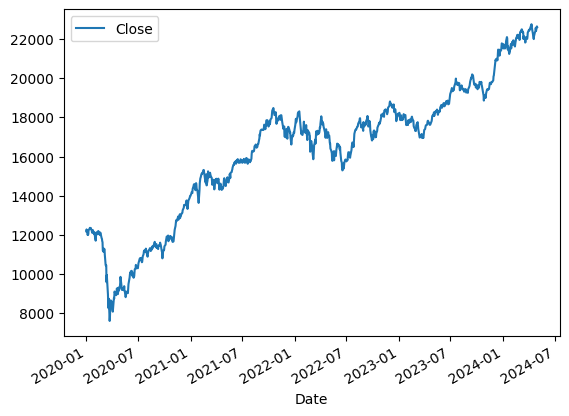

In [ ]:
df.plot()

In [ ]:
df.columns

Index(['Close'], dtype='object')

In [ ]:
df = df.rename_axis('Date').reset_index() #to use the first column Date as a column
df.columns = ['ds','y']
df.head()

,ds,y
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195


In [ ]:
df.dropna()

,ds,y
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195
...,...,...
1066,2024-04-24,22402.400391
1067,2024-04-25,22570.349609
1068,2024-04-26,22419.949219
1069,2024-04-29,22643.400391


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
model=Prophet.Prophet()
df.columns
df.dropna(axis=0,inplace=True)

In [ ]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxbzoj8g7/l8z0q1d1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxbzoj8g7/ydbcqsik.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60563', 'data', 'file=/tmp/tmpxbzoj8g7/l8z0q1d1.json', 'init=/tmp/tmpxbzoj8g7/ydbcqsik.json', 'output', 'file=/tmp/tmpxbzoj8g7/prophet_model20z9v_1a/prophet_model-20240512080935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:09:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:09:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates=model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
1431,2025-04-26
1432,2025-04-27
1433,2025-04-28
1434,2025-04-29
1435,2025-04-30


In [ ]:
prediction=model.predict(future_dates)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,12453.678505,12248.838572,13252.937715,12453.678505,12453.678505,275.214130,275.214130,275.214130,93.593898,93.593898,93.593898,181.620232,181.620232,181.620232,0.0,0.0,0.0,12728.892635
1,2020-01-02,12418.814962,12247.392595,13176.454188,12418.814962,12418.814962,282.307824,282.307824,282.307824,79.476182,79.476182,79.476182,202.831643,202.831643,202.831643,0.0,0.0,0.0,12701.122786
2,2020-01-03,12383.951418,12185.622302,13137.925473,12383.951418,12383.951418,281.968155,281.968155,281.968155,58.293364,58.293364,58.293364,223.674791,223.674791,223.674791,0.0,0.0,0.0,12665.919573
3,2020-01-06,12279.360788,12098.679367,13080.115723,12279.360788,12279.360788,334.799504,334.799504,334.799504,54.102767,54.102767,54.102767,280.696737,280.696737,280.696737,0.0,0.0,0.0,12614.160292
4,2020-01-07,12244.497245,12139.994068,13093.239510,12244.497245,12244.497245,381.999545,381.999545,381.999545,85.138503,85.138503,85.138503,296.861042,296.861042,296.861042,0.0,0.0,0.0,12626.496790


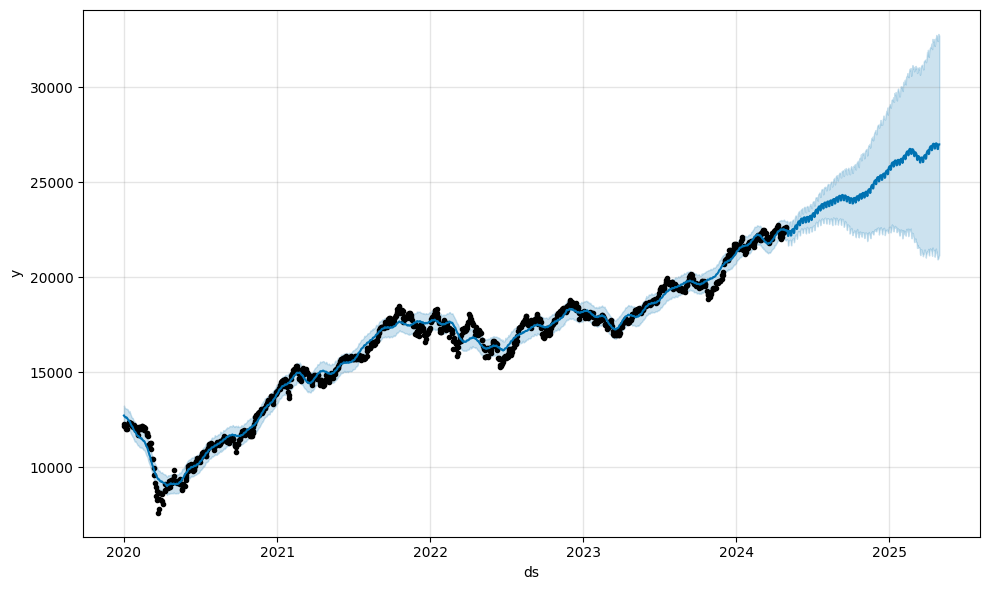

In [ ]:

model.plot(prediction);

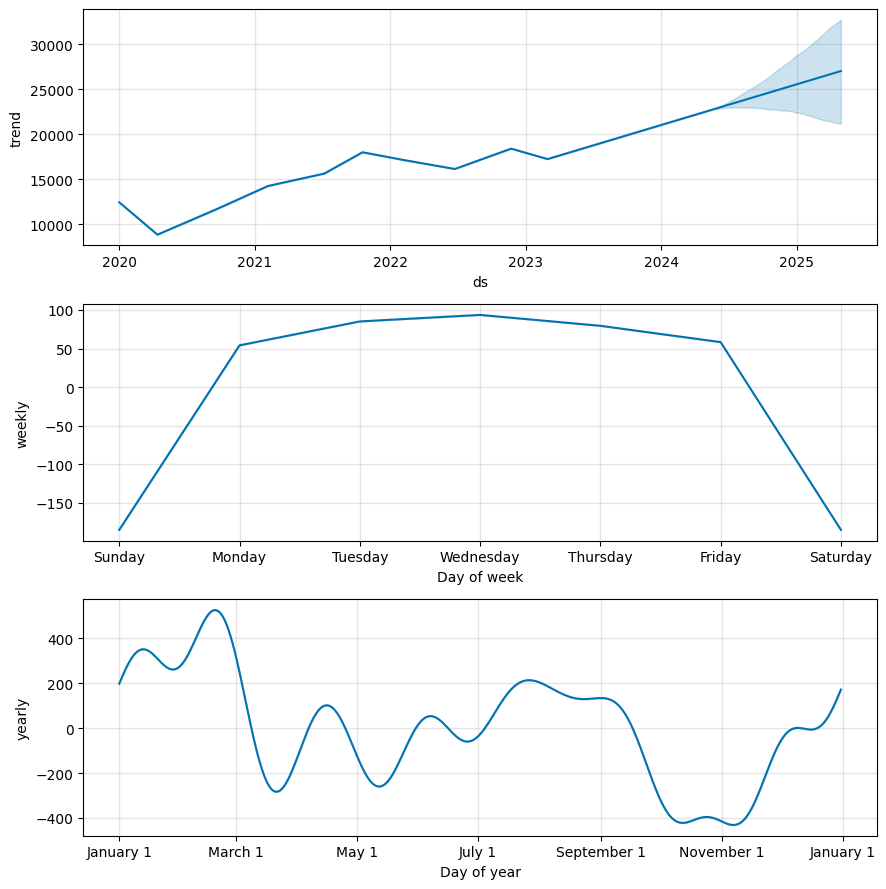

In [ ]:
model.plot_components(prediction);

In [ ]:
df.head()

,ds,y
0,2020-01-01,12182.500000
1,2020-01-02,12282.200195
2,2020-01-03,12226.650391
3,2020-01-06,11993.049805
4,2020-01-07,12052.950195


In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='1000 days', period='70 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 4 forecasts with cutoffs between 2022-10-03 00:00:00 and 2023-05-01 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxbzoj8g7/8g4g0ndz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxbzoj8g7/dhsw18ch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94179', 'data', 'file=/tmp/tmpxbzoj8g7/8g4g0ndz.json', 'init=/tmp/tmpxbzoj8g7/dhsw18ch.json', 'output', 'file=/tmp/tmpxbzoj8g7/prophet_modelz8wybf7y/prophet_model-20240512081441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:14:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:14:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxbzoj8g7/h63e78jh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxbzoj8g7/w39s4yfx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-10-04,17449.960883,16906.583694,17996.903127,17274.300781,2022-10-03
1,2022-10-06,17494.571105,16992.305423,18002.649082,17331.800781,2022-10-03
2,2022-10-07,17480.226787,16971.359861,18002.448993,17314.650391,2022-10-03
3,2022-10-10,17539.127485,16997.445851,18019.868453,17241.000000,2022-10-03
4,2022-10-11,17612.303245,17115.900504,18164.125136,16983.550781,2022-10-03


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,478278.495490,691.576818,562.682978,0.031209,0.029086,0.031261,0.515306
1,37 days,491182.280054,700.843977,568.922324,0.031529,0.028344,0.031573,0.513605
2,38 days,503643.739974,709.678617,577.720400,0.031994,0.029086,0.032027,0.510204
3,39 days,518727.864750,720.227648,590.619338,0.032685,0.031252,0.032711,0.500000
4,42 days,530005.038741,728.014450,601.065875,0.033233,0.031252,0.033254,0.484694


In [ ]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,478278.495490,691.576818,562.682978,0.031209,0.029086,0.031261,0.515306
1,37 days,491182.280054,700.843977,568.922324,0.031529,0.028344,0.031573,0.513605
2,38 days,503643.739974,709.678617,577.720400,0.031994,0.029086,0.032027,0.510204
3,39 days,518727.864750,720.227648,590.619338,0.032685,0.031252,0.032711,0.500000
4,42 days,530005.038741,728.014450,601.065875,0.033233,0.031252,0.033254,0.484694


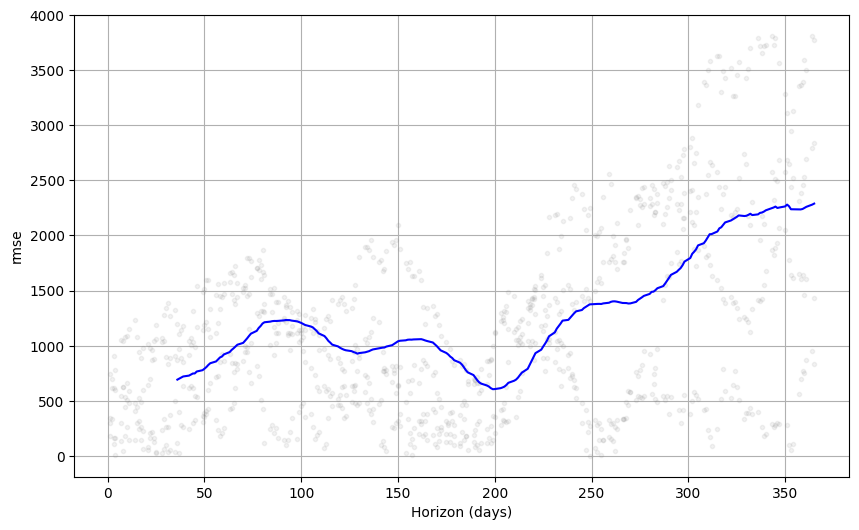

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')